In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("winequality-red.csv",sep=";")

In [7]:
df.head(5)
X=df.drop(columns='quality').copy()
y=df['quality'].copy()


<AxesSubplot: xlabel='quality', ylabel='count'>

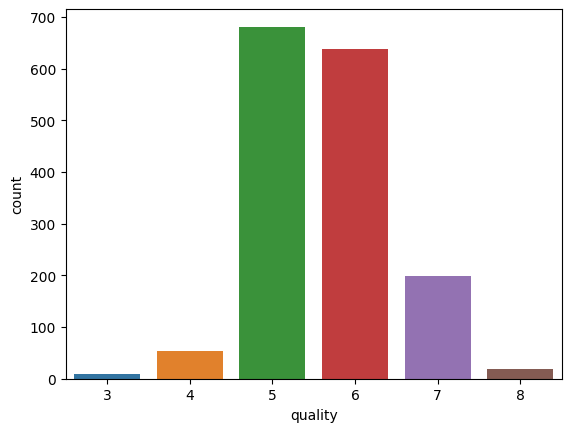

In [8]:
sns.countplot(x=df['quality'])

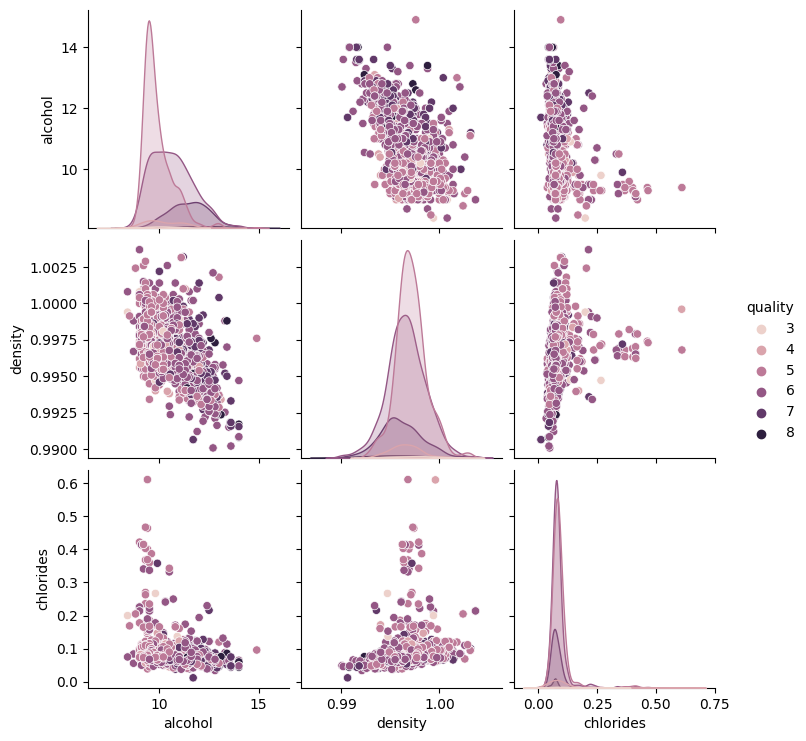

In [9]:
sns.pairplot(df[['alcohol','density','chlorides','quality']], hue='quality')

In [10]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [11]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(Xtrain,ytrain)

LinearRegression()

In [12]:
model.fit()
model.score(Xtest,ytest)


0.3032955222652044

In [13]:
model.score??


In [14]:
from sklearn.metrics import r2_score

y_pred = model.predict(X)
r2_score(y, y_pred)

0.3573402414909923

In [15]:
len(model.coef_),len(X.columns)

(11, 11)

In [16]:
X.columns


Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [17]:
df_coeff=pd.DataFrame(model.coef_,columns=['Coefficients'],index=X.columns)
df_coeff

,Coefficients
fixed acidity,0.050019
volatile acidity,-1.090984
citric acid,-0.316022
residual sugar,0.021292
chlorides,-2.523022
free sulfur dioxide,0.004237
total sulfur dioxide,-0.003041
density,-35.373757
pH,-0.304902
sulphates,1.049967


In [18]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [19]:
X=housing.data
y=housing.target

In [20]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

model.fit(Xtrain,ytrain)

LinearRegression()

In [21]:
housing.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [22]:
model.score(Xtest,ytest)
coefficients=pd.DataFrame(model.coef_,columns=['coefficient'],index=housing.feature_names)

In [23]:
coefficients


,coefficient
MedInc,0.432314
HouseAge,0.009075
AveRooms,-0.103809
AveBedrms,0.601197
Population,-0.000005
AveOccup,-0.003373
Latitude,-0.431994
Longitude,-0.446246


# Implementing Linear Regression

In [24]:
class LinearRegression:
    def __init__(self,n,alpha):
        self.n=n
        self.weights=0
        self.bias=0
        self.alpha=alpha
        
    def fit(self,Xtrain,ytrain):
        
        self.cost=[]
        n=Xtrain.shape[1]
        m=Xtrain.shape[0]
        self.weights=np.zeros(n)
        self.bias=0
        
        X_train=np.array(Xtrain)
        y_train=np.array(ytrain)
             
        for i in range(self.n):           
            y_predict=(X_train@self.weights)+self.bias
            dJ_by_dw=(1/m)*(X_train).T @ (y_predict-y_train)
            dJ_by_db=(1/m)*np.sum(y_train-y_predict)
            
            self.weights=self.weights-self.alpha*dJ_by_dw
            self.bias=self.bias-self.alpha*dJ_by_db
            
            self.cost.append(self.calculate_cost(self.weights,self.bias,Xtrain,ytrain))
        
           
    def predict(self,Xtest):
        X_test=np.array(Xtest)
        y_predict=(X_test @ self.weights)+self.bias
        return y_predict
    
    
    def cost_iteration(self):
        plt.plot(np.arange(self.n),self.cost)
        plt.xlabel("Iteration Number")
        plt.ylabel("Cost")
        plt.grid(visible=True)
        
    def calculate_cost(self,w,b,X,y):
        y_predict=np.dot(X,w)+b
        m=X.shape[0]
        return (1/(2*m))*np.sum((y_predict-y)**2)
    
           
    def score(self,Xtest,ytest):
        X_test=np.array(Xtest)
        y_test=np.array(ytest)
        y_predict=self.predict(Xtest)
        
        numerator=np.sum((y_predict-y_test)**2)        
        denominator=0
        for i in range(y_test.shape[0]):
            denominator+=(y_test[i]-np.mean(y_test))**2
        r2=1-(numerator/denominator)
        adjusted_r2=1-(r2*(ytest.shape[0]-1))/(ytest.shape[0]-Xtest.shape[1]-1)
        
        
        return adjusted_r2

In [25]:
np.arange(1,5)

array([1, 2, 3, 4])

None


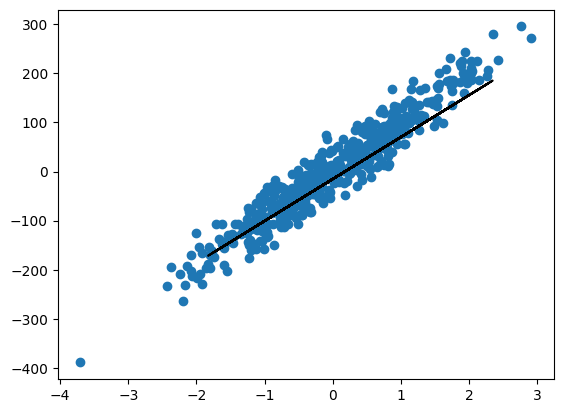

In [26]:
from sklearn.datasets import make_regression
X,y=make_regression(n_samples=500,n_features=1,noise=30)

from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)


model=LinearRegression(200,0.01)
print(model.fit(Xtrain,ytrain))
y_predict=model.predict(Xtest)
y_predict

plt.scatter(X,y)
plt.plot(Xtest,y_predict,color="black")

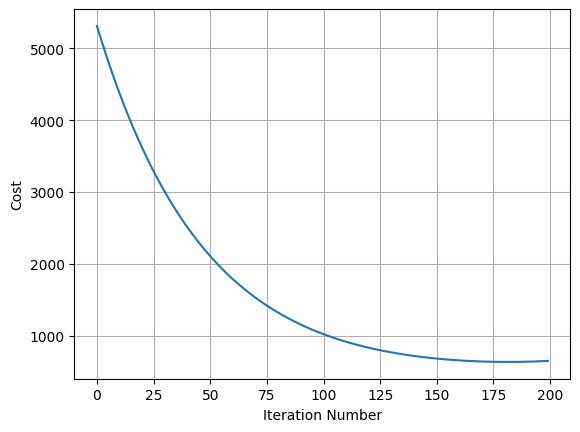

In [27]:
model.cost_iteration()

In [28]:
# df=pd.read_csv("winequality-red.csv",sep=";")
# df.head(5)
# X=df.drop(columns='quality').copy()
# y=df['quality'].copy()

# from sklearn.model_selection import train_test_split
# Xtrain,Xtest,ytrain,ytest=train_test_split(X,y)

In [29]:
model=LinearRegression(100,0.01)

In [30]:
model.fit(Xtrain,ytrain)
model.predict(Xtest)

array([ -14.0255623 ,   61.18131644,  -80.60438196,  140.82646036,
        -66.97424977,   31.5140184 ,    0.8382588 ,  -21.72605347,
        -19.05196754,  -22.83512699,   93.38454724,   24.13490691,
         69.7927694 ,   16.92618762,  -40.35018332,  -17.6105061 ,
         36.44258032,  -41.04482494,   93.3960848 ,  -31.70688877,
       -110.57924226,  -10.36256306,   55.05658299,   28.01328255,
         -7.38147764,  -80.9118895 ,  108.16640827,  -82.68422663,
        -72.47462815,  120.18385738,  -49.98328583,  -71.00502426,
          4.98221546,   64.63748269, -116.61613288,   -0.38065758,
        -40.64290207,  -98.56615023,   29.33455197,   22.91561269,
          4.62265749,  -24.9257611 ,   42.23498401,  -32.90468888,
        -12.53862848,  -20.60807617,  119.96259738,  -58.88494226,
         25.84970146,  -47.11682731,   28.55882165,  -60.47900772,
         81.32651709,   11.45825356,   31.60185649,  -70.68902991,
        -48.73676534,  145.15605128,   -9.75510699,  -41.05217

In [31]:
# ytest.iloc[0]
model.score(Xtest,ytest)

0.18951708514123788

In [32]:
import ipywidgets as widgets


In [33]:
int_range = widgets.IntSlider()
output2 = widgets.Output()

display(int_range, output2)

def on_value_change(change):
    with output2:
        print(change['new'])

w = int_range.observe(on_value_change, names='value')

IntSlider(value=0)

Output()

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

# Generate some sample data for regression
np.random.seed(0)
x = np.linspace(0, 10, 100)
y_actual = 2 * x + 5
noise = np.random.normal(0, 2, size=len(x))
y = y_actual + noise

# Define your function that performs regression and plots the data
def perform_regression(w, b):
    y_pred = w * x + b
    
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', label='Actual')
    plt.plot(x, y_pred, color='red', label='Regression Line')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Regression Analysis')
    plt.legend()
    plt.grid(True)
    plt.show()

# Create the interactive plot
interact(perform_regression, w=(-10, 10, 0.5), b=(-10, 10, 0.5))


interactive(children=(FloatSlider(value=0.0, description='w', max=10.0, min=-10.0, step=0.5), FloatSlider(valu…

<function __main__.perform_regression(w, b)>

In [35]:
w